# Laboratorio: Análisis de Regresión

### Antes de empezar:

* Lee el archivo README.md
* Comenta tanto como puedas y utiliza los recursos (archivo README.md)

¡Feliz aprendizaje!

## Desafío 1
Trabajo en un bootcamp de programación, y he desarrollado una teoría de que cuanto más jóvenes son mis estudiantes, más a menudo llegan tarde a clase. Para probar mi hipótesis, he recopilado algunos datos en la siguiente tabla:

| StudentID | Edad | Retrasos |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |


In [10]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

Utiliza este comando para crear un dataframe con los datos proporcionados en la tabla.
~~~~
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [11]:
# Your code here. 
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Edad,Retrasos
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Dibuja un diagrama de dispersión (scatter plot) para los datos.

<Axes: xlabel='Edad', ylabel='Retrasos'>

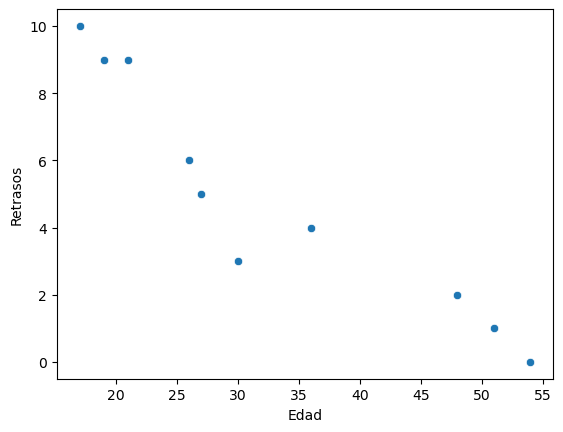

In [12]:
# Your code here
sns.scatterplot(x="Edad", y="Retrasos", data=student_data)

¿Ves alguna tendencia? ¿Puedes hacer alguna hipótesis sobre la relación entre la edad y el número de retrasos?

**RESPUESTA:** Se ve una relación más o menos inversamente lineal entre la edad y el número de retrasos: a mayor edad, menos retrasos.

Calcula la covarianza y la correlación de las variables en tu gráfico. ¿Cuál es la diferencia entre estas dos medidas? Compara sus valores. ¿Qué te indican en este caso? Agrega tus respuestas como comentarios después de tu código.

In [13]:
# your code here
student_data.cov()

,Edad,Retrasos
Edad,187.655556,-45.566667
Retrasos,-45.566667,12.544444


In [14]:
student_data.corr()

,Edad,Retrasos
Edad,1.000000,-0.939163
Retrasos,-0.939163,1.000000


In [15]:
covarianza = student_data.cov().iloc[0, 1]
correlacion = student_data.corr().iloc[0, 1]

print(f"Covarianza: {covarianza}")
print(f"Correlación: {correlacion}")

Covarianza: -45.56666666666666
Correlación: -0.9391626886887121


Construye un modelo de regresión para estos datos. ¿Cuál será tu variable de resultado? ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

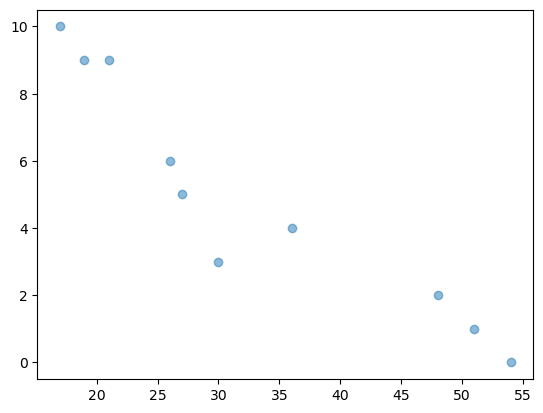

In [16]:
# your explanation here
X = student_data.Edad.values.reshape(-1, 1)
y = student_data.Retrasos.values

plt.plot(X, y, "o", alpha=.5)

In [17]:
# Modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# Check train and test sizes
#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(10, 1) (8, 1) (2, 1)
(10,) (8,) (2,)


In [18]:
# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
lm.fit(X_train, y_train)

# Print coefs
print(lm.intercept_, lm.coef_)
print()
print(f'Utilizo un modelo de regresión lineal, de la librería scikit-learn, y obtengo una variable de {lm.coef_} y una constante de {lm.intercept_}')

12.247594936708861 [-0.22860759]

Utilizo un modelo de regresión lineal, de la librería scikit-learn, y obtengo una variable de [-0.22860759] y una constante de 12.247594936708861


Grafica tu modelo de regresión en tu diagrama de dispersión.

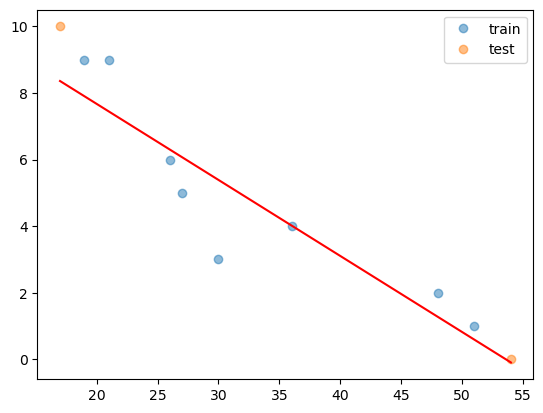

In [19]:
# Your code here.
# Define xmin xmax for the model:
xmin, xmax = round(X.min()), round(X.max())

x_model = np.arange(xmin, xmax+1)
y_model=[lm.intercept_+lm.coef_*x for x in x_model] # np.arange returns evenly spaced values within a given interval.

plt.plot(X_train, y_train, "o", alpha=0.5, label="train") # alpha, transparency value, between 0 (transparent) and 1 (opaque).
plt.plot(X_test, y_test, "o", alpha=0.5, label="test") # alpha, transparency value, between 0 (transparent) and 1 (opaque).
plt.plot(x_model, y_model,'r'); 

plt.legend()
plt.show()
# The red line gives the predicted values of this model

Interpreta los resultados de tu modelo. ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? ¿Podemos decir que la edad es un buen predictor de la tardanza? Agrega tus respuestas como comentarios después de tu código.

**RESPUESTA:** La edad será un buen predictor para personas más mayores (i.e. los puntos quedan más cerca de la recta). No será tan bueno para personas más jovenes donde el error de predicción será mayor (los puntos reales están más alejados del modelo de regresión).

## Desafío 2
Para la segunda parte de este laboratorio, utilizaremos el conjunto de datos vehicles.csv. Puedes encontrar una copia del conjunto de datos en la carpeta de GitHub. Este conjunto de datos incluye variables relacionadas con las características de los vehículos, incluyendo el modelo, la marca y los estándares de eficiencia energética, así como las emisiones de CO2 de cada coche. Como se discutió en clase, el objetivo de este ejercicio es predecir las emisiones de CO2 de los vehículos basándose en varias variables independientes.

In [20]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("../vehicles.csv")
vehicles

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


Vamos a utilizar las siguientes variables para nuestro análisis: Año, Cilindros, Barriles de Combustible/Año, MPG Combinado, y Costo de Combustible/Año. Utilizaremos 'Emisiones de CO2 Gramos/Milla' como nuestra variable de resultado.

Calcula las correlaciones entre cada una de estas variables y el resultado. ¿Cuál variable crees que será la más importante para determinar las emisiones de CO2? ¿Cuál proporciona la menor cantidad de información útil para determinar las emisiones de CO2? Agrega tus respuestas como comentarios después de tu código.

In [21]:
# Your code here.
subset = ['Year','Cylinders','Fuel Barrels/Year','City MPG','Fuel Cost/Year','CO2 Emission Grams/Mile']
ss_vehicles = vehicles[subset]
ss_vehicles

,Year,Cylinders,Fuel Barrels/Year,City MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,18,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,14,2550,555.437500
...,...,...,...,...,...,...
35947,2013,3.0,9.155833,34,1100,244.000000
35948,2014,3.0,9.155833,34,1100,243.000000
35949,2015,3.0,9.155833,34,1100,244.000000
35950,2016,3.0,9.155833,34,1100,246.000000


In [22]:
ss_vehicles.corr()

,Year,Cylinders,Fuel Barrels/Year,City MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.161818,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.703866,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.877752,0.916208,0.986189
City MPG,0.161818,-0.703866,-0.877752,1.000000,-0.858645,-0.894139
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.858645,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.894139,0.930865,1.000000


**RESPUESTA:** El numero de barriles/año, en primer lugar, y el coste del combustible parecen tener mucha relación con las emisiones de CO2. Por otro lado, de todas las variables, el año parece ser el que menor efecto tiene en las emisiones.

Construye un modelo de regresión para estos datos. ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

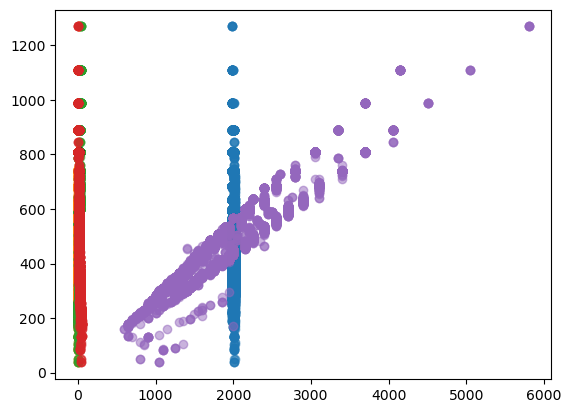

In [23]:
# Your code here.
# Decidir variable que queremos predecir
X = ss_vehicles[['Year','Cylinders','Fuel Barrels/Year','City MPG','Fuel Cost/Year']].values.reshape(-1, 5)
y = ss_vehicles[['CO2 Emission Grams/Mile']].values

plt.plot(X, y, "o", alpha=.5)

In [24]:
# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(28761, 5) (7191, 5) (28761, 1) (7191, 1)


In [25]:
X_train

array([[2010.        ,    5.        ,   18.31166667,   16.        ,
        1850.        ],
       [2012.        ,    6.        ,   16.4805    ,   18.        ,
        1650.        ],
       [1989.        ,    6.        ,   18.31166667,   16.        ,
        1850.        ],
       ...,
       [2010.        ,    8.        ,   17.34789474,   17.        ,
        1750.        ],
       [1989.        ,    4.        ,   16.4805    ,   18.        ,
        1650.        ],
       [2011.        ,    4.        ,   13.73375   ,   23.        ,
        1400.        ]])

### Método A) sklearn

In [26]:
# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
lm.fit(X_train, y_train)

# Print coeficient and intercept of the regression
print(lm.intercept_, lm.coef_)

[799.82323133] [[-0.35724308  1.59213435 20.09873251 -2.13726611  0.03425301]]


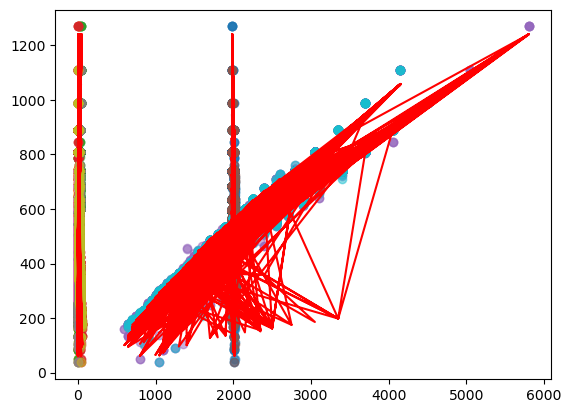

In [27]:
# Visualizar los resultados
y_train_pred = lm.predict(X_train)

plt.plot(X_train, y_train, "o", alpha=.5)
plt.plot(X_test, y_test, "o", alpha=.5)
plt.plot(X_train, y_train_pred, "r")


In [28]:
# Evaluar modelo
# Compute Score for training and testing sets 
# Best possible score is 1.0, lower values are worse.
print('Score:')
print('\ttrain:',lm.score(X_train, y_train), 'test:',lm.score(X_test, y_test))

# Compute MSE for training and testing sets 
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

mse_train = np.mean((y_train_pred - y_train)**2)
mse_test = np.mean((y_test_pred - y_test)**2)
print('MSE:')
print('\ttrain:', mse_train, 'test:', mse_test)

Score:
	train: 0.9799319780285016 test: 0.9790856846738079
MSE:
	train: 284.955527903634 test: 294.4103115845536


In [29]:
# Evaluar modelo usando métricas de sklearn
# Compute Score
print('Score:')
print('\t',r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred))

# Compute MSE for training and testing sets 
print('MSE:')
print('\t',mean_squared_error(y_train_pred, y_train), mean_squared_error(y_test_pred, y_test))

Score:
	 0.9799319780285016 0.9790856846738079
MSE:
	 284.955527903634 294.4103115845536


### Método B) statsmodel

In [30]:
# Crear modelo
X_train_sm = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train_sm) # Creates an object OLS estimator
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 2.808e+05
Date:                Thu, 31 Oct 2024   Prob (F-statistic):               0.00
Time:                        16:45:43   Log-Likelihood:            -1.2209e+05
No. Observations:               28761   AIC:                         2.442e+05
Df Residuals:                   28755   BIC:                         2.442e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        799.8232     22.221     35.995      0.000     756.270     843.377
x1            -0.3572      0.011    -32.274      0.000      -0.379      -0.336
x2             1.5921      0.096     16.622      0.000       1.404       1.780
x3            20.0987      0.066    303.216      0.000      19.969      20.229
x4            -2.1373      0.046    -46.860      0.000      -2.227      -2.048
x5             0.0343      0.001     62.037      0.000       0.033       0.035
==============================================================================
Omnibus:                    60185.265   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        292110333.134
Skew:                          18.049   Prob(JB):                         0.00
Kurtosis:                     495.394   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
# Realizamos predicciones sobre los datos de prueba
X_test_sm = sm.add_constant(X_test)
y_pred = est.predict(X_test_sm)

# Evaluamos la performance del modelo con RMSE y R^2
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Raíz del error cuadrático medio
r2 = r2_score(y_test, y_pred)  # R^2

print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

RMSE: 17.158388956558568
R^2: 0.979085684673808


c:\Users\tatan\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Imprime el resumen de tu regresión e interpreta los resultados. ¿Cuáles son las variables más importantes en tu modelo y por qué? ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? Agrega tus respuestas como comentarios después de tu código.

In [32]:
# Your code here.

# Hemos aplicado un modelo de regresión lineal múltiple

# Vemos que aplicando el método A) obtenemos el siguiente interceptor y coeficientes para las variables ['Year','Cylinders','Fuel Barrels/Year','City MPG','Fuel Cost/Year']:
# [845.33048867] [[-0.37674919  1.77973753 19.74058284 -2.30069737  0.03515074]]

# Y la calidad del model: 
#   Score: 0.9792124403019938
#   MSE: 293.8422062096163


# Mientras que aplicando el método B) obtenemos:
# constante/interceptor: 845.3305
# coeficientes:
#   x1	-0.3767
#   x2	1.7797
#   x3	19.7406
#   x4	-2.3007
#   x5	0.0352

# Y la calidad del modelo es:
#   R^2: 0.979
#   RMSE: 16.107397430886067

# Creo que el modelo no es demasiado bueno porque el MSE es muy alto. Es posible que podamos generar un modelo mejor seleccionando mejor las 
#  variables que usamos para la predicción (e.g. eliminando 'Fuel Cost/Year', que según los resultados (0.0352) tiene poco efecto en la predicción y
#  que además ya vimos en la matriz de correlación que tiene una alta correlación con 'Fuel Barrels/Year')


## Desafío Extra: Análisis de Errores

Estoy sospechando de las últimas fiestas que he organizado: parece que cuanto más gente invito, más personas no pueden asistir. Para saber si mi presentimiento está respaldado por los datos, he decidido hacer un análisis. He recopilado mis datos en la tabla a continuación, donde X es el número de personas que invité, y Y es el número de personas que asistieron.

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

Queremos saber si la relación modelada por las dos variables aleatorias es lineal o no, y por lo tanto, si es apropiado modelarla con una regresión lineal.
Primero, construye un dataframe con los datos.

In [33]:
# Your code here.
invitados = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,13]})
invitados

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Dibuja un diagrama de dispersión (scatter plot) para los datos y ajusta una línea de regresión.

(8, 1) (6, 1) (2, 1)
(8,) (6,) (2,)
0.30841121495327073 [0.71028037]


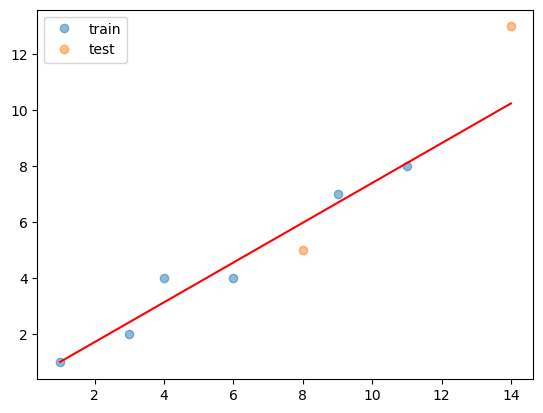

Score:
	train: 0.9639519359145527 test: 0.733404664162809
MSE:
	train: 0.22429906542056074 test: 4.2655253733950556


In [34]:
# Your code here.
X = invitados.X.values.reshape(-1, 1)
y = invitados.Y.values

# Graficar relación entre variables
#plt.plot(X, y, "o", alpha=.5)

# Modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# Check train and test sizes
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
lm.fit(X_train, y_train)

# Print coefs
print(lm.intercept_, lm.coef_)

# Define xmin xmax for the model:
xmin, xmax = round(X.min()), round(X.max())

x_model = np.arange(xmin, xmax+1)
y_model=[lm.intercept_+lm.coef_*x for x in x_model] # np.arange returns evenly spaced values within a given interval.

plt.plot(X_train, y_train, "o", alpha=0.5, label="train") # alpha, transparency value, between 0 (transparent) and 1 (opaque).
plt.plot(X_test, y_test, "o", alpha=0.5, label="test") # alpha, transparency value, between 0 (transparent) and 1 (opaque).
plt.plot(x_model, y_model,'r'); 

plt.legend()
plt.show()
# The red line gives the predicted values of this model

# Evaluar modelo
# Compute Score for training and testing sets 
# Best possible score is 1.0, lower values are worse.
print('Score:')
print('\ttrain:',lm.score(X_train, y_train), 'test:',lm.score(X_test, y_test))

# Compute MSE for training and testing sets 
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

mse_train = np.mean((y_train_pred - y_train)**2)
mse_test = np.mean((y_test_pred - y_test)**2)
print('MSE:')
print('\ttrain:', mse_train, 'test:', mse_test)

¿Qué ves? ¿Qué te indica este gráfico sobre la probable relación entre las variables? Imprime los resultados de tu regresión.

**RESPUESTA:** Ambas variables tienen una relación lineal.

¿Ves algún punto problemático o valores atípicos en tus datos? Elimina estos puntos y recalcula tu regresión. Imprime el nuevo diagrama de dispersión con tu nuevo modelo y los resultados de tu modelo.

In [35]:
# Your response here.

# Los valores extremos son problemáticos: 
#   por la banda baja, lo más probable cuando invitamos a 1 persona es que estemos seguros de que va a poder venir; 
#   por la banda alta, una asistencia 13 de 14 es probablemente inususal (valor atípico);
invitados_prima = invitados[(invitados['X']<14)]
invitados_prima

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8


(7, 1) (5, 1) (2, 1)
(7,) (5,) (2,)
0.048672566371681825 [0.69469027]


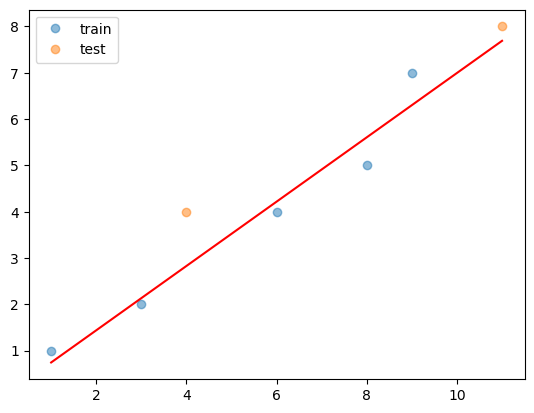

Score:
	train: 0.9567225586089116 test: 0.8161440794110736
MSE:
	train: 0.19734513274336282 test: 0.7354236823557058


In [36]:
X = invitados_prima.X.values.reshape(-1, 1)
y = invitados_prima.Y.values

# Graficar relación entre variables
#plt.plot(X, y, "o", alpha=.5)

# Modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# Check train and test sizes
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
lm.fit(X_train, y_train)

# Print coefs
print(lm.intercept_, lm.coef_)

# Define xmin xmax for the model:
xmin, xmax = round(X.min()), round(X.max())

x_model = np.arange(xmin, xmax+1)
y_model=[lm.intercept_+lm.coef_*x for x in x_model] # np.arange returns evenly spaced values within a given interval.

plt.plot(X_train, y_train, "o", alpha=0.5, label="train") # alpha, transparency value, between 0 (transparent) and 1 (opaque).
plt.plot(X_test, y_test, "o", alpha=0.5, label="test") # alpha, transparency value, between 0 (transparent) and 1 (opaque).
plt.plot(x_model, y_model,'r'); 

plt.legend()
plt.show()
# The red line gives the predicted values of this model

# Evaluar modelo
# Compute Score for training and testing sets 
# Best possible score is 1.0, lower values are worse.
print('Score:')
print('\ttrain:',lm.score(X_train, y_train), 'test:',lm.score(X_test, y_test))

# Compute MSE for training and testing sets 
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

mse_train = np.mean((y_train_pred - y_train)**2)
mse_test = np.mean((y_test_pred - y_test)**2)
print('MSE:')
print('\ttrain:', mse_train, 'test:', mse_test)

¿Qué cambió? Basado en los resultados de los dos modelos y tus gráficos, ¿qué puedes decir sobre la forma de los datos con el punto problemático y sin él?

**RESPUESTA:** Ahora el modelo tiene mayor fiabilidad (0,95) mientras que el error cuadrático medio se mantiene bajo.